## Logistic Regression on Diabetes Dataset 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve

In [3]:
data = pd.read_csv("C:\\Users\\black\\Desktop\\ml_py\\datasets\\diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
x = data.iloc[:, :8]
x.shape

(768, 8)

In [20]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [9]:
y = data.iloc[:, 8:]
y.shape

(768, 1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=40)

In [16]:
clf = LogisticRegression(solver="lbfgs", max_iter=5000)

In [17]:
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=5000)

In [21]:
y_pred = clf.predict(x_test)

In [27]:
# Confusion matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[124,  42],
       [ 18,  47]], dtype=int64)

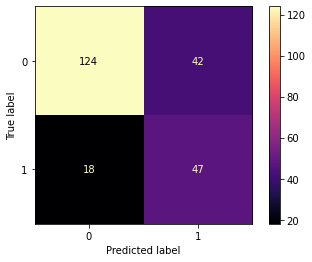

In [23]:
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=clf.classes_),
                              display_labels=clf.classes_)
cm.plot(cmap="magma")

In [29]:
accuracy_score(y_pred, y_test)

0.7402597402597403

In [34]:
precision_score(y_pred, y_test)

0.5280898876404494

In [35]:
recall_score(y_pred, y_test)

0.7230769230769231

In [36]:
f1_score(y_pred, y_test)

0.6103896103896104

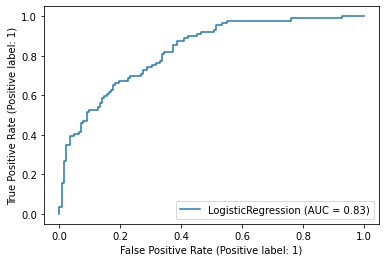

In [43]:
# ROC Curve
metrics.RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()